#### Set working dir

In [12]:
setwd('/home/lindsay/hioekg-compare-years')

#### Load packages

In [13]:
library(ggplot2)
library(plotly)
library(lubridate)
library(reshape2)

#### Read dataframe(s) and force R to recognize date col as a date object

In [26]:
# df_all <- read.csv('df_all.csv')
# df_all$date<- as.Date(df_all$date, '%m-%d-%Y')
df_all <- df # A dupe
df_2013 <- subset(df, year == 2013)
df_2014 <- subset(df, year == 2014)
nsmz <- subset(df, group == 'nsmz')
nmdz <- subset(df, group == 'nmdz')
nlgz <- subset(df, group == 'nlgz')
nsm <- subset(df, group == 'nsm')
nlg <- subset(df, group == 'nlg')

### Plotting by group: nsmz

I'm going to remove all rows of the data where the concentration value exceeds 2.5sd from the mean. 

Also, I'm reordering the sector levels to go north to south, the group levels and the months.

In [32]:
nsmz <- subset(nsmz, concentration < ((mean(nsmz$concentration)) + (2.5*(sd(nsmz$concentration)))))
nrow(nsmz)

[1] 151524

In [56]:
nsmz_2013 = subset(df_2013, group == 'nsmz')
nsmz_2014 = subset(df_2014, group == 'nsmz')
nsmz <- subset(nsmz, concentration < ((mean(nsmz$concentration)) + (2.5*(sd(nsmz$concentration))))) # Remove extreme outliers beyond 2.5sd from mean
nrow(nsmz)
df<-nsmz # for easy cut n paste

[1] 141350

In [57]:
df<-nsmz # for easy cut n paste

In [58]:
df$sector <- factor(df$sector, levels = c("NB", "CB", "SB"))
#df$group <- factor(df$group, levels = c("nsmz", "nmdz", "nlgz", "nsm", "nlg"))
df$month <- factor(df$month, levels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

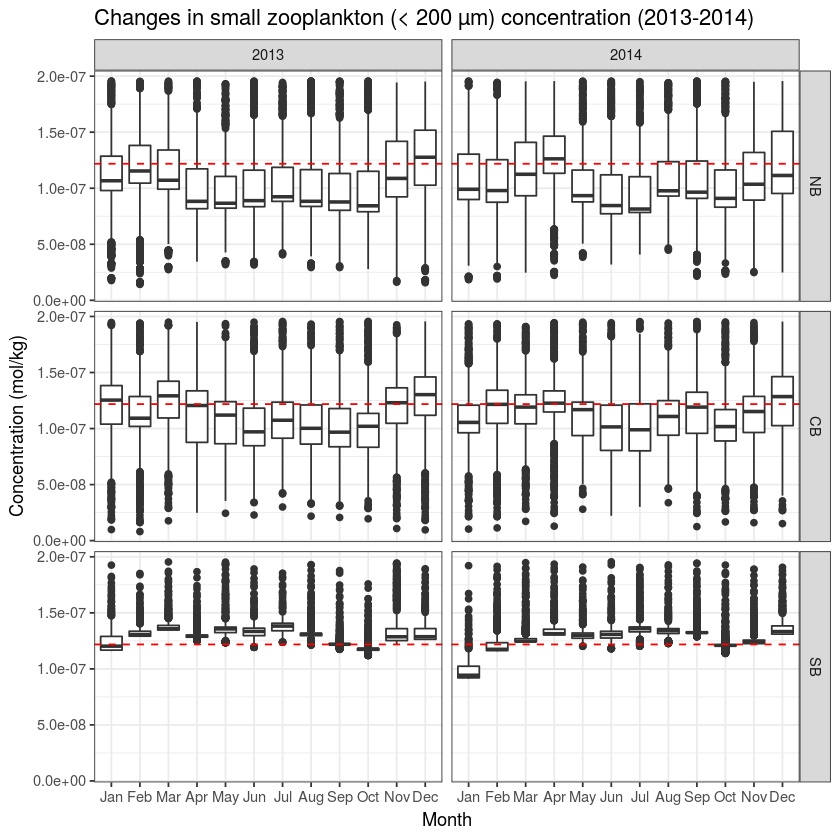

In [60]:
df$sector <- factor(df$sector, levels = c("NB", "CB", "SB"))
#df$group <- factor(df$group, levels = c("nsmz", "nmdz", "nlgz", "nsm", "nlg"))
df$month <- factor(df$month, levels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
p <- ggplot(df, aes(month, concentration))
p + geom_boxplot() + 
theme_bw() +
geom_hline(yintercept=(median(nsmz_2013$concentration)), linetype="dashed", color = "red") +
facet_grid(sector ~ year) +
ggtitle("Changes in small zooplankton (< 200 µm) concentration (2013-2014)") +
labs(x="Month", y="Concentration (mol/kg)")

### Plotting nmdz: med zoos

In [61]:
nmdz_2013 = subset(df_2013, group == 'nmdz')
nmdz_2014 = subset(df_2014, group == 'nmdz')
nmdz <- subset(nmdz, concentration < ((mean(nmdz$concentration)) + (2.5*(sd(nmdz$concentration))))) # Remove extreme outliers beyond 2.5sd from mean
nrow(nmdz)
df<-nmdz # for easy cut n paste

[1] 154081

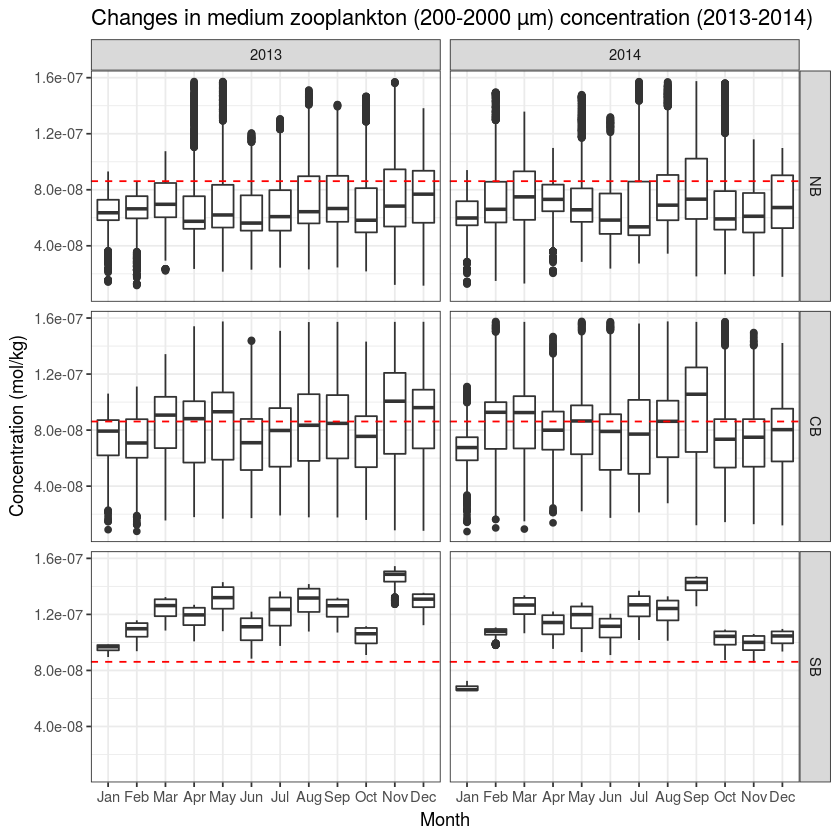

In [62]:
df$sector <- factor(df$sector, levels = c("NB", "CB", "SB"))
#df$group <- factor(df$group, levels = c("nsmz", "nmdz", "nlgz", "nsm", "nlg"))
df$month <- factor(df$month, levels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
p <- ggplot(df, aes(month, concentration))
p + geom_boxplot() + 
geom_hline(yintercept=(median(nmdz_2013$concentration)), linetype="dashed", color = "red") +
theme_bw() +
facet_grid(sector ~ year) +
ggtitle("Changes in medium zooplankton (200-2000 µm) concentration (2013-2014)") +
labs(x="Month", y="Concentration (mol/kg)")

Not that interesting. I'm going to make a boxplot with the same methodology for large zooplankton, which are more interesting to look at, I think.

### Plotting nlgz: large zoos

In [51]:
summary(nlgz)
nlgz <- subset(nlgz, concentration < ((mean(nlgz$concentration)) + (2.5*(sd(nlgz$concentration))))) # Remove extreme outliers beyond 2.5sd from mean
nrow(nlgz)
df<-nlgz # for easy cut n paste

       X             month            date            sector    
 Min.   :    0   Apr    :12968   Min.   :2013-01-01   CB:65713  
 1st Qu.:18944   Aug    :12968   1st Qu.:2013-06-01   NB:53899  
 Median :37888   Dec    :12968   Median :2013-12-01   SB:31943  
 Mean   :38372   Feb    :12968   Mean   :2013-12-08             
 3rd Qu.:58072   Jan    :12968   3rd Qu.:2014-06-01             
 Max.   :77807   Jul    :12968   Max.   :2014-12-01             
                 (Other):73747                                  
 concentration        group             year     
 Min.   :2.389e-09   nlg :     0   Min.   :2013  
 1st Qu.:1.308e-08   nlgz:151555   1st Qu.:2013  
 Median :1.606e-08   nmdz:     0   Median :2013  
 Mean   :1.644e-08   nsm :     0   Mean   :2013  
 3rd Qu.:1.923e-08   nsmz:     0   3rd Qu.:2014  
 Max.   :3.090e-08                 Max.   :2014  
                                                 

[1] 149666

In [52]:
nlgz_2013 = subset(df_2013, group == 'nlgz')
nlgz_2014 = subset(df_2014, group == 'nlgz')

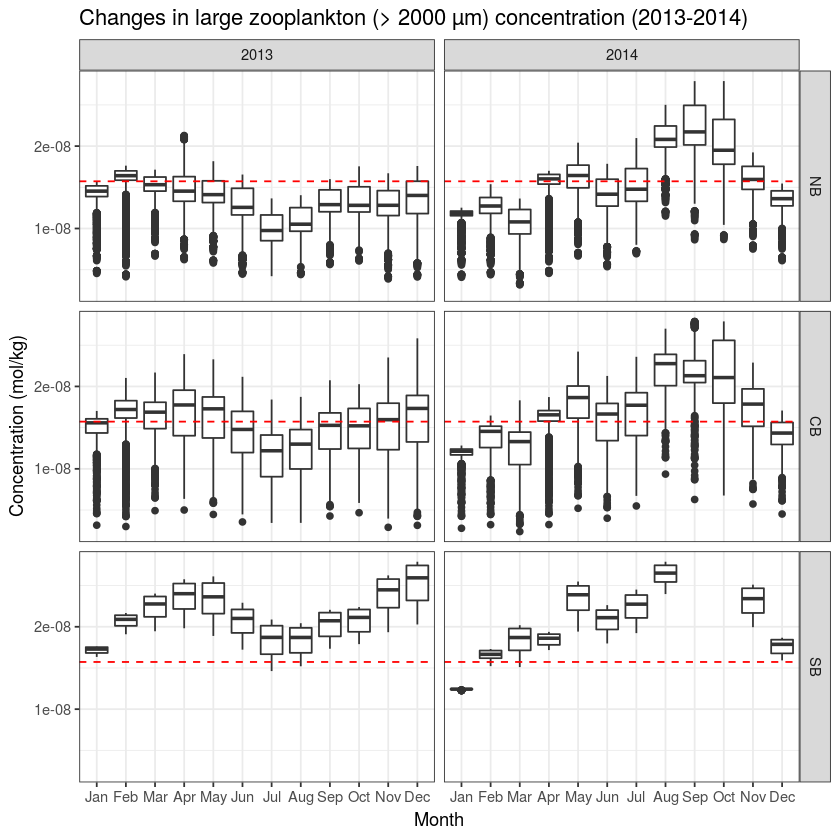

In [53]:
df$sector <- factor(df$sector, levels = c("NB", "CB", "SB"))
#df$group <- factor(df$group, levels = c("nsmz", "nmdz", "nlgz", "nsm", "nlg"))
df$month <- factor(df$month, levels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
p <- ggplot(df, aes(month, concentration))
p + geom_boxplot() + 
theme_bw() +
geom_hline(yintercept=(median(nlgz_2013$concentration)), linetype="dashed", color = "red") +
facet_grid(sector ~ year) +
ggtitle("Changes in large zooplankton (> 2000 µm) concentration (2013-2014)") +
labs(x="Month", y="Concentration (mol/kg)")

*Early Oct. 2019*: From the first look it seems that the takeaways here so far are...
- There is a lot of variability in the data.
- The 2014 median values are *consistently* and nearly universally higher for large zoos.
- I think it would be useful to run some statistical tests on these data to see if we can really say much statistically about the apparent differences.

### Graphical representation of Granger causality tests

In [81]:
# Create data
no3data <- data.frame(
  nutrient=c('no3','no3','no3','no3','no3','no3','no3','no3','no3','no3',
         'no3','no3','no3','no3','no3','no3','no3','no3','no3','no3',
         'no3','no3','no3','no3','no3','no3','no3','no3','no3','no3',
         'no3','no3','no3','no3','no3','no3','no3','no3','no3','no3',
         'no3','no3','no3','no3','no3','no3','no3','no3','no3','no3',
         'no3','no3','no3','no3','no3','no3','no3','no3','no3','no3') ,
  group=c("nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz",
          "nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz") ,  
  year=c(2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014) ,
  day=c(0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5) ,
  value=c(1,1,1,1,1,1,1,0,0,0,
          1,0,0,0,0,0,0,0,0,0,
          1,1,0,0,0,0,0,0,0,0,
          0,0,0,0,0,0,0,0,0,0,
          0,1,0,0,0,0,0,0,0,0,
          0,0,0,0,0,0,0,0,0,0)
  )

In [80]:
# Create data
po4data <- data.frame(
  nutrient=c('po4','po4','po4','po4','po4','po4','po4','po4','po4','po4',
         'po4','po4','po4','po4','po4','po4','po4','po4','po4','po4',
         'po4','po4','po4','po4','po4','po4','po4','po4','po4','po4',
         'po4','po4','po4','po4','po4','po4','po4','po4','po4','po4',
         'po4','po4','po4','po4','po4','po4','po4','po4','po4','po4',
         'po4','po4','po4','po4','po4','po4','po4','po4','po4','po4') ,
  group=c("nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz",
          "nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz") ,  
  year=c(2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014) ,
  day=c(0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5) ,
  value=c(1,1,1,1,1,1,1,1,1,1,
          1,1,0,0,0,0,0,0,0,0,
          0,0,1,1,0,1,1,0,1,1,
          0,0,1,1,1,1,0,0,0,0,
          0,1,0,0,0,0,0,0,0,0,
          0,0,1,1,1,1,1,1,1,1)
  )

In [79]:
# Create data
sio4data <- data.frame(
  nutrient=c('sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4',
         'sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4',
         'sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4',
         'sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4',
         'sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4',
         'sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4','sio4') ,
  group=c("nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz",
          "nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz") ,  
  year=c(2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014) ,
  day=c(0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5) ,
  value=c(1,1,1,1,1,1,1,1,1,0,
          1,0,0,0,0,0,0,0,0,0,
          0,0,0,0,0,0,0,0,0,0,
          0,0,1,1,1,0,0,0,0,0,
          0,1,0,0,0,0,0,0,0,0,
          0,0,1,1,1,1,1,1,1,1)
  )

In [78]:
# Create data
nsmdata <- data.frame(
  nutrient=c('nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm',
         'nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm',
         'nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm',
         'nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm',
         'nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm',
         'nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm','nsm') ,
  group=c("nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz",
          "nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz") ,  
  year=c(2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014) ,
  day=c(0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5) ,
  value=c(1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,0,0,0,0,
          1,1,1,1,1,1,1,0,1,1,
          1,1,1,1,1,1,1,1,1,1,
          1,1,1,0,0,0,0,0,0,0,
          1,1,1,1,1,0,1,1,1,1)
  )

In [77]:
# Create data
nlgdata <- data.frame(
  nutrient=c('nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg',
         'nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg',
         'nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg',
         'nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg',
         'nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg',
         'nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg','nlg') ,
  group=c("nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz",
          "nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz","nsmz", 
          "nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz","nmdz",
          "nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz","nlgz") ,  
  year=c(2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,
         2014,2014,2014,2014,2014,2014,2014,2014,2014,2014) ,
  day=c(0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,
        0.5,1,1.5,2,2.5,3,3.5,4,4.5,5) ,
  value=c(0,0,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,
          0,0,0,0,0,0,0,0,0,0,
          1,1,1,1,1,1,1,1,1,1,
          1,1,0,0,0,0,0,0,1,1)
  )

In [82]:
df <- rbind(no3data,po4data)
df <- rbind(df,sio4data)
df <- rbind(df,nsmdata)
df <- rbind(df,nlgdata)

In [83]:
tail(df)

nutrient group year day value
295 nlg      nlgz  2014 2.5 0    
296 nlg      nlgz  2014 3.0 0    
297 nlg      nlgz  2014 3.5 0    
298 nlg      nlgz  2014 4.0 0    
299 nlg      nlgz  2014 4.5 1    
300 nlg      nlgz  2014 5.0 1

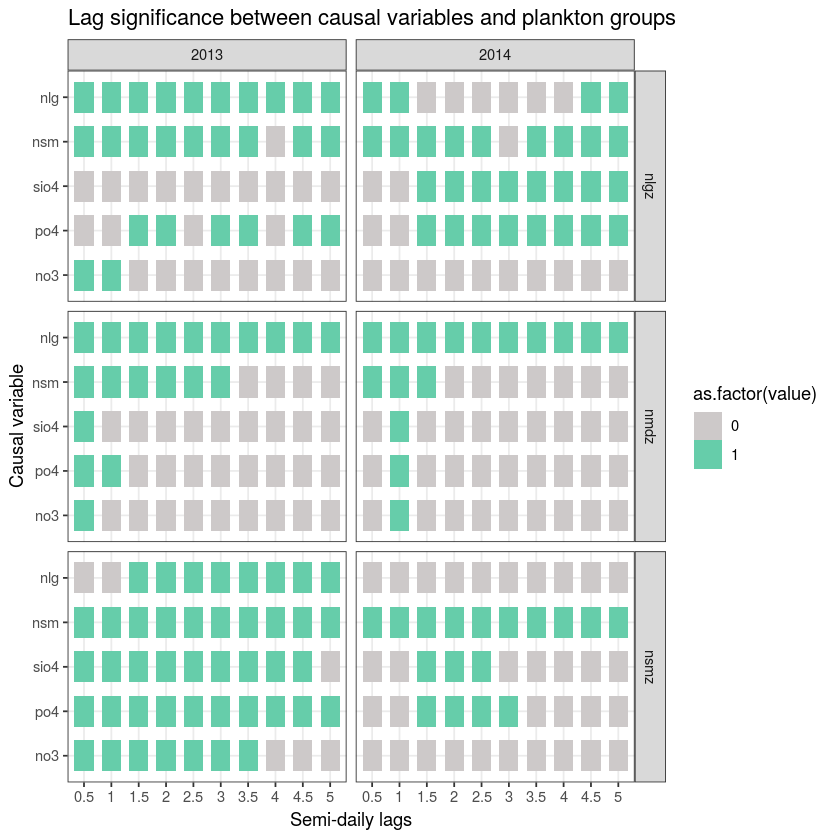

In [97]:
ggplot(df, aes(x=as.factor(day),y=as.factor(nutrient), fill=as.factor(value))) + 
  geom_tile(width=0.7, height=0.7) +
  scale_fill_manual(values=c('snow3','mediumaquamarine')) +
  facet_grid(group ~ year) +
  theme_bw() +
  ggtitle("Lag significance between causal variables and plankton groups") +
  labs(x="Semi-daily lags", y="Causal variable")

### Plotting phytos, nutrients by year

First, load all dfs, force R to recognize dates, add group indicator:

In [46]:
setwd('/home/lindsay/hioekg-compare-years')

In [47]:
list.files()

[1] "df_2014.csv"                "df_monthly_mean_all.csv"   
 [3] "nlg_df_2013.csv"            "nlg_df_2014.csv"           
 [5] "nlg_semidaily_df_2013.csv"  "nlg_semidaily_df_2014.csv" 
 [7] "nlg_semidaily_mean_df.csv"  "nlg_weekly_df.csv"         
 [9] "nlgz_df_2013.csv"           "nlgz_df_2014.csv"          
[11] "nlgz_semidaily_df_2013.csv" "nlgz_semidaily_df_2014.csv"
[13] "nmdz_df_2013.csv"           "nmdz_df_2014.csv"          
[15] "nmdz_semidaily_df_2013.csv" "nmdz_semidaily_df_2014.csv"
[17] "no3_semidaily_df_2013.csv"  "no3_semidaily_df_2014.csv" 
[19] "no3_semidaily_mean_df.csv"  "no3_weekly_df.csv"         
[21] "nsm_df_2013.csv"            "nsm_df_2014.csv"           
[23] "nsm_semidaily_df_2013.csv"  "nsm_semidaily_df_2014.csv" 
[25] "nsm_semidaily_mean_df.csv"  "nsm_weekly_df.csv"         
[27] "nsmz_df_2013.csv"           "nsmz_df_2014.csv"          
[29] "nsmz_semidaily_df_2013.csv" "nsmz_semidaily_df_2014.csv"
[31] "po4_semidaily_df_2013.csv"  "po4_semidaily_df_2014.csv" 
[33] "po4_semidaily_mean_df.csv"  "po4_weekly_df.csv"         
[35] "Sectors"                    "sio4_semidaily_df_2013.csv"
[37] "sio4_semidaily_df_2014.csv" "sio4_semidaily_mean_df.csv"
[39] "sio4_weekly_df.csv"

In [48]:
no3_df <- read.csv('no3_semidaily_mean_df.csv')
po4_df <- read.csv('po4_semidaily_mean_df.csv')
sio4_df <- read.csv('sio4_semidaily_mean_df.csv')
nsm_df <- read.csv('nsm_semidaily_mean_df.csv')
nlg_df <- read.csv('nlg_semidaily_mean_df.csv')

no3_df$date<- as.Date(no3_df$date, '%Y-%m-%d')
po4_df$date<- as.Date(po4_df$date, '%Y-%m-%d')
sio4_df$date<- as.Date(sio4_df$date, '%Y-%m-%d')
nsm_df$date<- as.Date(nsm_df$date, '%Y-%m-%d')
nlg_df$date<- as.Date(nlg_df$date, '%Y-%m-%d')

ERROR: Error in as.Date.default(no3_df$date, "%Y-%m-%d"): do not know how to convert 'no3_df$date' to class “Date”


Concatenate all frames:

In [54]:
df <- rbind(no3_df,po4_df)
nutr_df <- rbind(df,sio4_df)
nutr_df$X <- NULL
phyto_df <- rbind(nlg_df,nsm_df)
phyto_df$X <- NULL

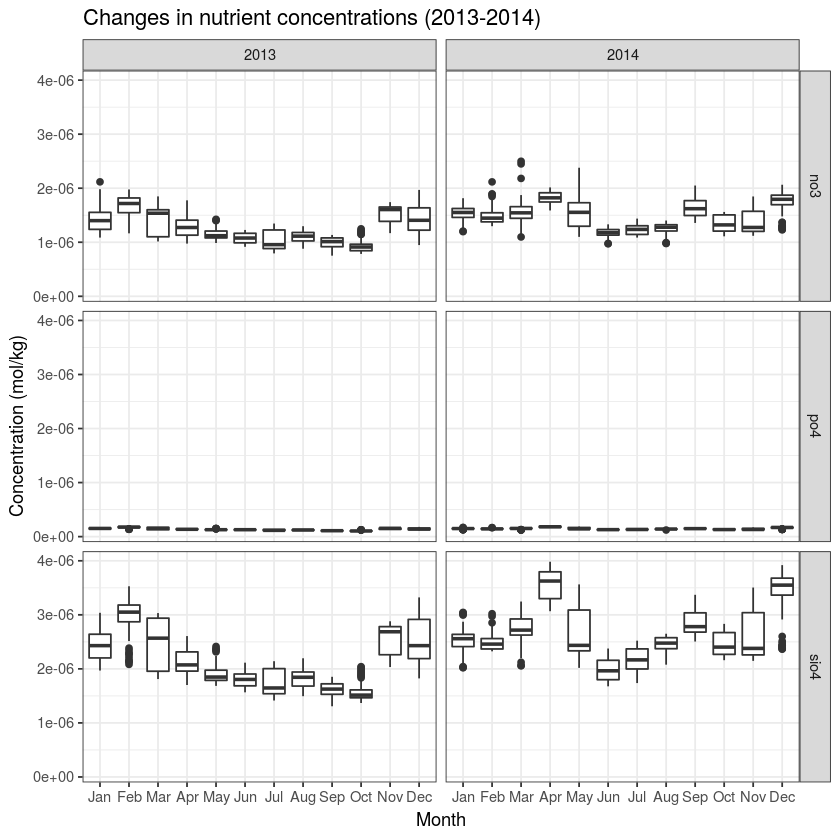

In [55]:
#df$group <- factor(df$group, levels = c("nsmz", "nmdz", "nlgz", "nsm", "nlg"))
nutr_df$month <- factor(nutr_df$month, levels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
p <- ggplot(nutr_df, aes(month, concentration))
p + geom_boxplot() + 
theme_bw() +
#geom_hline(yintercept=(median(nlgz_2013$concentration)), linetype="dashed", color = "red") +
facet_grid(group ~ year) +
ggtitle("Changes in nutrient concentrations (2013-2014)") +
labs(x="Month", y="Concentration (mol/kg)")

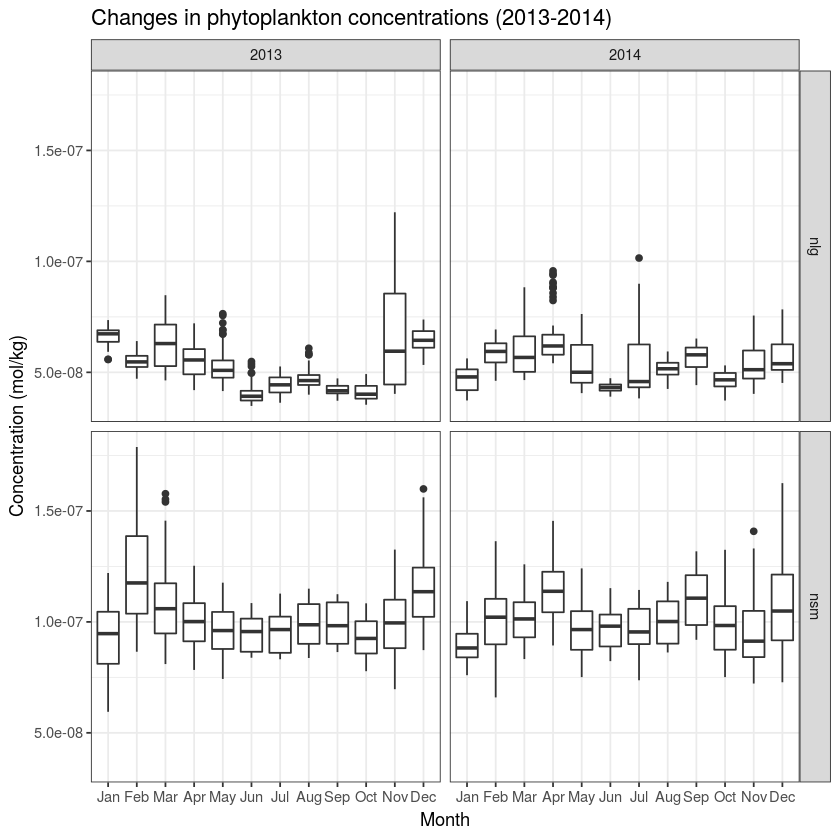

In [56]:
phyto_df$month <- factor(phyto_df$month, levels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
p <- ggplot(phyto_df, aes(month, concentration))
p + geom_boxplot() + 
theme_bw() +
#geom_hline(yintercept=(median(nlgz_2013$concentration)), linetype="dashed", color = "red") +
facet_grid(group ~ year) +
ggtitle("Changes in phytoplankton concentrations (2013-2014)") +
labs(x="Month", y="Concentration (mol/kg)")